# Quick Commerce Data Analysis

## Quick Commerce (Q-Commerce) Analytics Dataset

This is a synthetic Quick Commerce (Q-Commerce) dataset simulating real-world order data from platforms like Blinkit, Zepto, Swiggy Instamart and others. 

It contains rich order-level features such as city, category, delivery time, ratings, discounts and revenue, making it ideal for practicing data clearning, EDA, visualization, dashboard building and extracting business insights.

In [177]:
# Import Python Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly.express as px

In [178]:
# Load Dataset
df = pd.read_csv('quick_commerce_data_raw.csv')
df

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
0,1000001,Swiggy Instamart,Noida,46,702.33750,19.182,11.97,12.0,Dairy,Wallet,2.1,1,3.2
1,1000002,Flipkart Minutes,Amritsar,56,1007.30000,19.644,12.74,10.0,Snacks,Cash on Delivery,2.3,0,3.2
2,1000003,Flipkart Minutes,Mumbai,18,1211.66000,16.910,4.85,NaN,Personal Care,Cash on Delivery,3.3,0,3.8
3,1000004,Swiggy Instamart,Delhi,23,1179.05925,5.864,6.44,2.0,Dairy,Credit Card,5.0,1,5.0
4,1000005,Dunzo,Mumbai,44,586.02550,12.470,2.45,13.0,Household,Wallet,3.7,0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1999996,Big Basket,Mumbai,48,72.33000,17.806,3.01,19.0,Fruits & Vegetables,Wallet,4.2,0,2.8
999996,1999997,Swiggy Instamart,Mumbai,33,1509.66300,18.306,10.51,9.0,Beverages,Debit Card,4.1,1,3.5
999997,1999998,Jio Mart,Noida,29,637.32300,17.590,2.65,6.0,Groceries,Cash on Delivery,3.4,0,4.6
999998,1999999,Dunzo,Pune,42,1103.12100,12.656,7.76,12.0,Snacks,Wallet,4.0,1,4.5


In [179]:
# Dataset Structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Order_ID                 1000000 non-null  int64  
 1   Company                  1000000 non-null  object 
 2   City                     948000 non-null   object 
 3   Customer_Age             1000000 non-null  int64  
 4   Order_Value              1000000 non-null  float64
 5   Delivery_Time_Min        1000000 non-null  float64
 6   Distance_Km              1000000 non-null  float64
 7   Items_Count              965000 non-null   float64
 8   Product_Category         1000000 non-null  object 
 9   Payment_Method           1000000 non-null  object 
 10  Customer_Rating          953000 non-null   float64
 11  Discount_Applied         1000000 non-null  int64  
 12  Delivery_Partner_Rating  895863 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory u

In [180]:
# Summary Statistics
df.describe()

,Order_ID,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,965000.000000,953000.000000,1000000.000000,895863.000000
mean,1.500000e+06,38.470387,571.643584,16.452412,7.750231,9.998317,3.042072,0.400883,3.749257
std,2.886753e+05,12.118520,382.784520,6.257172,4.186665,5.478725,1.186872,0.490078,0.722121
min,1.000001e+06,18.000000,50.000000,5.000000,0.500000,1.000000,1.000000,0.000000,2.500000
25%,1.250001e+06,28.000000,287.840150,12.368000,4.130000,5.000000,2.000000,0.000000,3.100000
50%,1.500000e+06,38.000000,531.324600,16.342000,7.740000,10.000000,3.000000,0.000000,3.700000
75%,1.750000e+06,49.000000,796.182500,20.196000,11.380000,15.000000,4.000000,1.000000,4.400000
max,2.000000e+06,59.000000,13877.325000,40.000000,15.000000,19.000000,5.000000,1.000000,5.000000


In [181]:
# Check Missing Values
df.isnull().sum()

Order_ID                        0
Company                         0
City                        52000
Customer_Age                    0
Order_Value                     0
Delivery_Time_Min               0
Distance_Km                     0
Items_Count                 35000
Product_Category                0
Payment_Method                  0
Customer_Rating             47000
Discount_Applied                0
Delivery_Partner_Rating    104137
dtype: int64

In [182]:
# To show the records which contain Any or All null values 
df[df.isna().any(axis=1)]

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
2,1000003,Flipkart Minutes,Mumbai,18,1211.66000,16.910,4.85,NaN,Personal Care,Cash on Delivery,3.3,0,3.8
6,1000007,Blinkit,Bengluru,37,516.86480,18.476,12.46,19.0,Snacks,Debit Card,2.8,0,NaN
17,1000018,Zepto,Delhi,23,1041.42975,5.000,14.74,18.0,Snacks,Wallet,NaN,1,NaN
21,1000022,Blinkit,NaN,41,716.89860,17.804,11.34,7.0,Beverages,Credit Card,2.7,1,3.6
22,1000023,Jio Mart,Delhi,48,50.00000,8.498,0.83,3.0,Snacks,Cash on Delivery,3.1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999966,1999967,Dunzo,NaN,39,783.89250,18.820,14.70,NaN,Household,Wallet,3.1,1,4.9
999975,1999976,Amazon Now,Bengluru,34,515.89380,21.294,10.49,10.0,Fruits & Vegetables,Wallet,NaN,1,3.0
999981,1999982,Amazon Now,NaN,33,939.34470,21.080,11.80,18.0,Dairy,Wallet,3.2,1,4.4
999983,1999984,Swiggy Instamart,Hyderabad,42,50.00000,13.386,2.31,2.0,Groceries,Wallet,NaN,0,3.2


In [183]:
df[df.isna().all(axis=1)]

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating


In [184]:
# Drop tthose rows that have missing values in 'City' column
df = df.dropna(subset = ['City'])

In [185]:
df.shape

(948000, 13)

In [186]:
# Check missing values
df.isna().sum()

Order_ID                       0
Company                        0
City                           0
Customer_Age                   0
Order_Value                    0
Delivery_Time_Min              0
Distance_Km                    0
Items_Count                33228
Product_Category               0
Payment_Method                 0
Customer_Rating            44575
Discount_Applied               0
Delivery_Partner_Rating    98694
dtype: int64

In [187]:
# Fill missing values with mode 
x =  df['Items_Count'].mode()
df['Items_Count'].fillna(x[0], inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_23324\2233860877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Items_Count'].fillna(x[0], inplace=True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_23324\2233860877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Items_Count'].fillna(x[0], inplace=True)


In [188]:
# Check missing values
df.isna().sum()

Order_ID                       0
Company                        0
City                           0
Customer_Age                   0
Order_Value                    0
Delivery_Time_Min              0
Distance_Km                    0
Items_Count                    0
Product_Category               0
Payment_Method                 0
Customer_Rating            44575
Discount_Applied               0
Delivery_Partner_Rating    98694
dtype: int64

***Fill Null values with Group-wise Mean/Mode***

In [189]:
# Use group-wise mean inputation in Customer_Rating
df["Customer_Rating"] = df.groupby("Company")["Customer_Rating"].transform(lambda x:x.fillna(x.mean()))

C:\Users\saksh\AppData\Local\Temp\ipykernel_23324\1932074182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Customer_Rating"] = df.groupby("Company")["Customer_Rating"].transform(lambda x:x.fillna(x.mean()))


In [190]:
# Check missing values
df.isna().sum()

Order_ID                       0
Company                        0
City                           0
Customer_Age                   0
Order_Value                    0
Delivery_Time_Min              0
Distance_Km                    0
Items_Count                    0
Product_Category               0
Payment_Method                 0
Customer_Rating                0
Discount_Applied               0
Delivery_Partner_Rating    98694
dtype: int64

In [191]:
# Use group-wise mean inputation in Deliver_Parter_Rating 
df["Delivery_Partner_Rating"] = df.groupby("Delivery_Time_Min")["Delivery_Partner_Rating"].transform(lambda y:y.fillna(y.mean()))

C:\Users\saksh\AppData\Local\Temp\ipykernel_23324\1321595859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Delivery_Partner_Rating"] = df.groupby("Delivery_Time_Min")["Delivery_Partner_Rating"].transform(lambda y:y.fillna(y.mean()))


In [192]:
# Check missing values
df.isna().sum()

Order_ID                    0
Company                     0
City                        0
Customer_Age                0
Order_Value                 0
Delivery_Time_Min           0
Distance_Km                 0
Items_Count                 0
Product_Category            0
Payment_Method              0
Customer_Rating             0
Discount_Applied            0
Delivery_Partner_Rating    76
dtype: int64

In [193]:
df['Delivery_Partner_Rating'] = df['Delivery_Partner_Rating'].fillna(df['Delivery_Partner_Rating'].mean())

C:\Users\saksh\AppData\Local\Temp\ipykernel_23324\2477360661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivery_Partner_Rating'] = df['Delivery_Partner_Rating'].fillna(df['Delivery_Partner_Rating'].mean())


In [194]:
# Check missing values
df.isna().sum()

Order_ID                   0
Company                    0
City                       0
Customer_Age               0
Order_Value                0
Delivery_Time_Min          0
Distance_Km                0
Items_Count                0
Product_Category           0
Payment_Method             0
Customer_Rating            0
Discount_Applied           0
Delivery_Partner_Rating    0
dtype: int64

***Cleaned the dataset***

In [195]:
# Dataset Structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 948000 non-null  int64  
 1   Company                  948000 non-null  object 
 2   City                     948000 non-null  object 
 3   Customer_Age             948000 non-null  int64  
 4   Order_Value              948000 non-null  float64
 5   Delivery_Time_Min        948000 non-null  float64
 6   Distance_Km              948000 non-null  float64
 7   Items_Count              948000 non-null  float64
 8   Product_Category         948000 non-null  object 
 9   Payment_Method           948000 non-null  object 
 10  Customer_Rating          948000 non-null  float64
 11  Discount_Applied         948000 non-null  int64  
 12  Delivery_Partner_Rating  948000 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 101.3+ MB


***Remove Outliers***

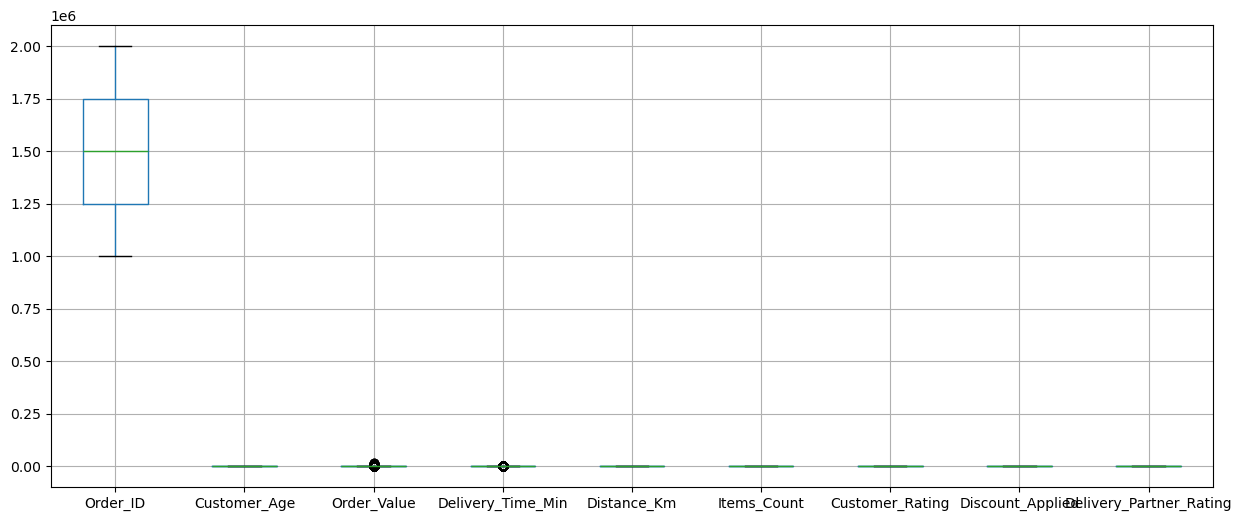

In [196]:
# Box Plot
df.boxplot(figsize=(15,6))
plt.show()

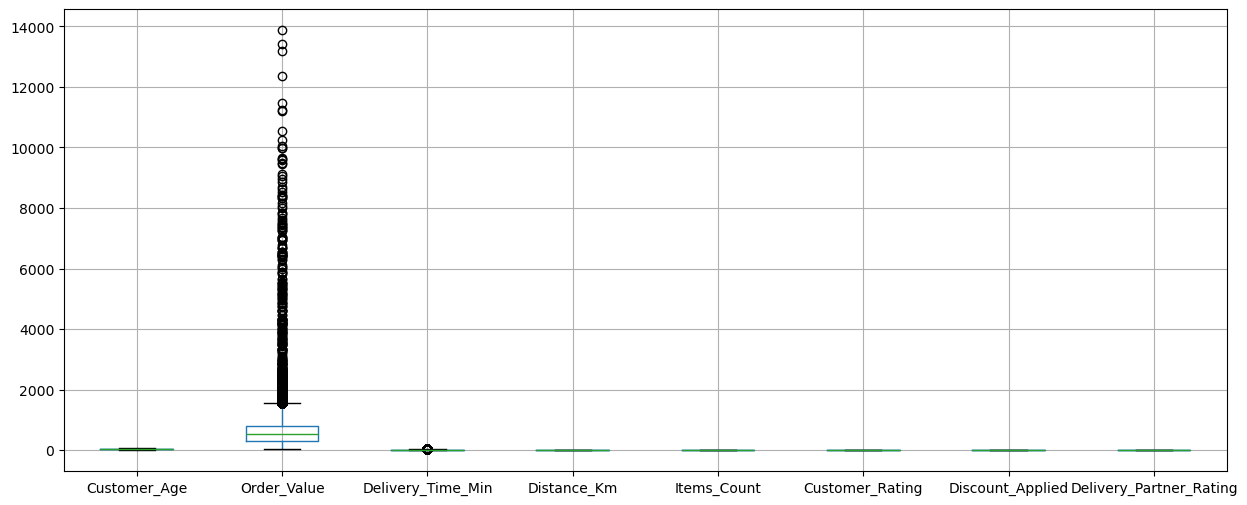

In [197]:
# Box plot without 'Order_ID' column
df.drop(columns=['Order_ID']).boxplot(figsize=(15,6))
plt.show()   # ← MUST have parentheses

In [198]:
# 1) Percentile (copping) Method 
# df['Order_Value'] = df["Order_Value"] = df["Order_Value"].clip(upper = 2500)


# 2) Filtering
df = df[df['Order_Value'] <= 2500]

In [199]:
df

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
0,1000001,Swiggy Instamart,Noida,46,702.33750,19.182,11.97,12.0,Dairy,Wallet,2.1,1,3.2
1,1000002,Flipkart Minutes,Amritsar,56,1007.30000,19.644,12.74,10.0,Snacks,Cash on Delivery,2.3,0,3.2
2,1000003,Flipkart Minutes,Mumbai,18,1211.66000,16.910,4.85,19.0,Personal Care,Cash on Delivery,3.3,0,3.8
3,1000004,Swiggy Instamart,Delhi,23,1179.05925,5.864,6.44,2.0,Dairy,Credit Card,5.0,1,5.0
4,1000005,Dunzo,Mumbai,44,586.02550,12.470,2.45,13.0,Household,Wallet,3.7,0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1999996,Big Basket,Mumbai,48,72.33000,17.806,3.01,19.0,Fruits & Vegetables,Wallet,4.2,0,2.8
999996,1999997,Swiggy Instamart,Mumbai,33,1509.66300,18.306,10.51,9.0,Beverages,Debit Card,4.1,1,3.5
999997,1999998,Jio Mart,Noida,29,637.32300,17.590,2.65,6.0,Groceries,Cash on Delivery,3.4,0,4.6
999998,1999999,Dunzo,Pune,42,1103.12100,12.656,7.76,12.0,Snacks,Wallet,4.0,1,4.5


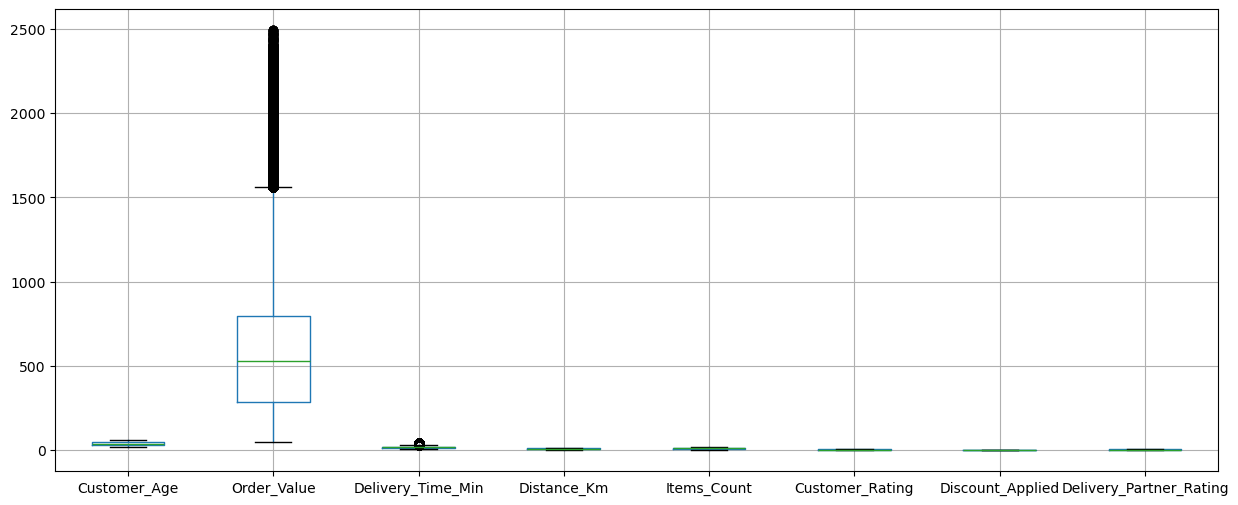

In [200]:
# Box plot without 'Order_ID' column
df.drop(columns=['Order_ID']).boxplot(figsize=(15,6))
plt.show()   # ← MUST have parentheses

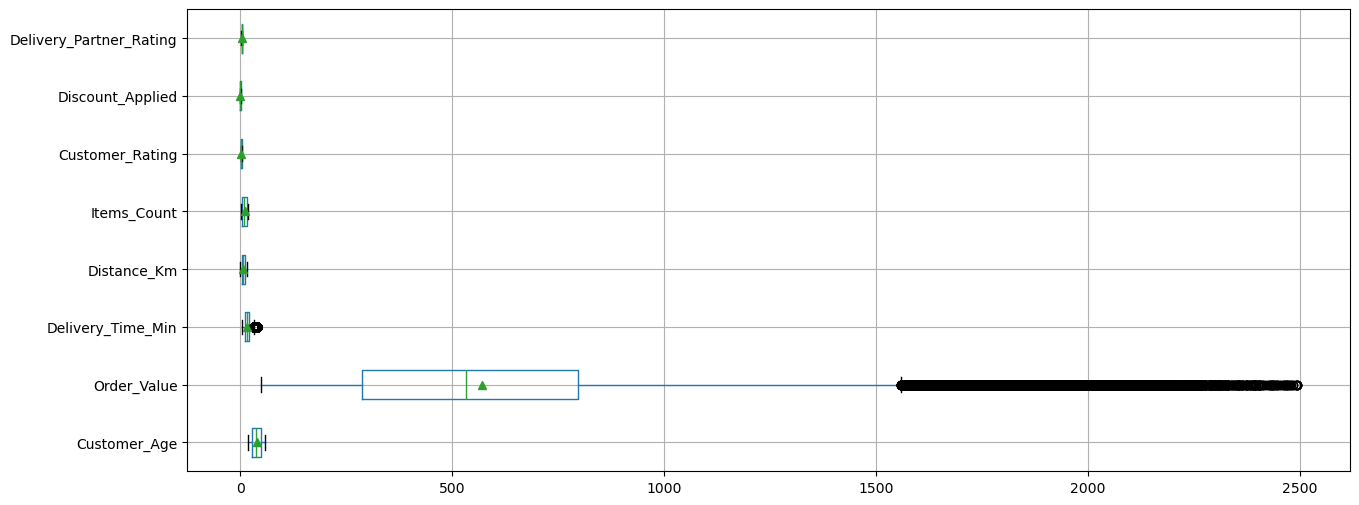

In [201]:
df.drop(columns=['Order_ID']).boxplot(figsize=(15,6),vert = False, showmeans = True)
plt.show() 

In [202]:
# Change the Datatype of the Order ID
df['Order_ID'] = df['Order_ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947752 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 947752 non-null  object 
 1   Company                  947752 non-null  object 
 2   City                     947752 non-null  object 
 3   Customer_Age             947752 non-null  int64  
 4   Order_Value              947752 non-null  float64
 5   Delivery_Time_Min        947752 non-null  float64
 6   Distance_Km              947752 non-null  float64
 7   Items_Count              947752 non-null  float64
 8   Product_Category         947752 non-null  object 
 9   Payment_Method           947752 non-null  object 
 10  Customer_Rating          947752 non-null  float64
 11  Discount_Applied         947752 non-null  int64  
 12  Delivery_Partner_Rating  947752 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 101.2+ MB


In [203]:
df['Order_Value'] = np.round(df['Order_Value'])

df['Delivery_Time_Min'] = np.round(df['Delivery_Time_Min'])

df['Distance_Km'] = np.round(df['Distance_Km'],1)

df['Customer_Rating'] = np.round(df['Customer_Rating'])

df['Delivery_Partner_Rating'] = np.round(df['Delivery_Partner_Rating'])

In [204]:
df.head()

,Order_ID,Company,City,Customer_Age,Order_Value,Delivery_Time_Min,Distance_Km,Items_Count,Product_Category,Payment_Method,Customer_Rating,Discount_Applied,Delivery_Partner_Rating
0,1000001,Swiggy Instamart,Noida,46,702.0,19.0,12.0,12.0,Dairy,Wallet,2.0,1,3.0
1,1000002,Flipkart Minutes,Amritsar,56,1007.0,20.0,12.7,10.0,Snacks,Cash on Delivery,2.0,0,3.0
2,1000003,Flipkart Minutes,Mumbai,18,1212.0,17.0,4.8,19.0,Personal Care,Cash on Delivery,3.0,0,4.0
3,1000004,Swiggy Instamart,Delhi,23,1179.0,6.0,6.4,2.0,Dairy,Credit Card,5.0,1,5.0
4,1000005,Dunzo,Mumbai,44,586.0,12.0,2.4,13.0,Household,Wallet,4.0,0,5.0


In [205]:
# Change the datatype of float to integer

df['Order_Value'] = df['Order_Value'].astype(int)

df['Delivery_Time_Min'] = df['Delivery_Time_Min'].astype(int)

df['Items_Count'] = df['Items_Count'].astype(int)

df['Customer_Rating'] = df['Customer_Rating'].astype(int)

df['Delivery_Partner_Rating'] = df['Delivery_Partner_Rating'].astype(int)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947752 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order_ID                 947752 non-null  object 
 1   Company                  947752 non-null  object 
 2   City                     947752 non-null  object 
 3   Customer_Age             947752 non-null  int64  
 4   Order_Value              947752 non-null  int32  
 5   Delivery_Time_Min        947752 non-null  int32  
 6   Distance_Km              947752 non-null  float64
 7   Items_Count              947752 non-null  int32  
 8   Product_Category         947752 non-null  object 
 9   Payment_Method           947752 non-null  object 
 10  Customer_Rating          947752 non-null  int32  
 11  Discount_Applied         947752 non-null  int64  
 12  Delivery_Partner_Rating  947752 non-null  int32  
dtypes: float64(1), int32(5), int64(2), object(5)
memory usage: 83.2+

***Above dataset is cleaned and modified***

<br><br>  

**Saved the cleaned dataset**

In [104]:
new_path = r"C:\Users\saksh\Documents\Data Analyst\EDA Projects\Q-Commerce Data Analysis\cleaned data/q_commerce_modified_data.csv"

In [105]:
df.to_csv(new_path, index = False)